In [1]:
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [4]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [5]:
a = tf.placeholder(tf.float32)

In [6]:
b = tf.placeholder(tf.float32)

In [7]:
add_op = a + b

In [8]:
mul_op = a * b

In [9]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    
    mult_result = sess.run(mul_op,feed_dict={a:rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Simple Network

In [10]:
n_features = 10
n_dense_neurons = 3

In [11]:
x = tf.placeholder(tf.float32,(None,n_features))

In [13]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [14]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [15]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)

In [16]:
a = tf.sigmoid(z)

In [17]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [22]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


# Simple Regression Example

In [62]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.46027697,  2.13776935,  1.87703546,  3.48833087,  5.07605886,
        6.08139211,  7.25036066,  7.30514808,  8.62606058,  9.2193729 ])

In [63]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,-1.5,10)
y_label

array([-1.5       , -0.38888889,  0.72222222,  1.83333333,  2.94444444,
        4.05555556,  5.16666667,  6.27777778,  7.38888889,  8.5       ])

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

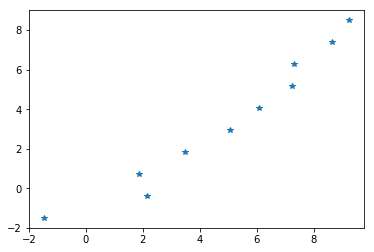

In [65]:
plt.plot(x_data,y_label,"*")

y = mx + b

In [74]:
np.random.rand(2)

array([0.23846439, 0.82377373])

In [86]:
m = tf.Variable(0.23846439)

In [87]:
b = tf.Variable(0.82377373)

In [95]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [96]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [97]:
init = tf.global_variables_initializer()

In [98]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1000
    
    for i in range(training_steps):
        sess.run(train)
    final_slope,final_intercept = sess.run([m,b])

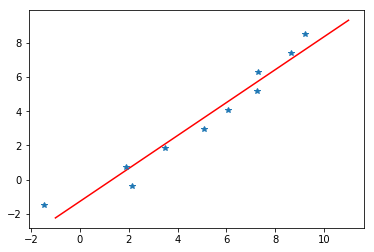

In [99]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test,y_pred_plot,'red')
plt.plot(x_data,y_label,"*")